In [72]:
import pandas as pd


In [10]:
!wget https://github.com/alamhanz/pandas_journey/blob/main/mydata/food_delivery_datasets.csv

--2021-10-06 09:04:54--  https://github.com/alamhanz/pandas_journey/blob/main/mydata/food_delivery_datasets.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘food_delivery_datasets.csv’

food_delivery_datas     [ <=>                ] 661.30K  --.-KB/s    in 0.06s   

2021-10-06 09:04:54 (10.3 MB/s) - ‘food_delivery_datasets.csv’ saved [677167]



In [13]:
read=pd.read_csv('/content/food_delivery_datasets.csv')

In [102]:
df=read[['order_id','food_price','rating']]

In [114]:
df

,order_id,food_price,rating,date_time
0,FOOD-10455,18900,5.0,2018-08-12 21:00:00
1,FOOD-10985,149000,5.0,2018-09-23 18:00:00
2,FOOD-10911,43800,NaN,2018-09-19 18:00:00
3,FOOD-10932,39900,5.0,2018-09-21 01:00:00
4,FOOD-10961,77700,NaN,2018-09-22 18:00:00
...,...,...,...,...
1071,FOOD-10921,103200,5.0,2018-09-20 15:00:00
1072,FOOD-10265,145700,5.0,2018-07-26 15:00:00
1073,FOOD-10534,177200,NaN,2018-08-21 20:00:00
1074,FOOD-10158,49300,5.0,2018-07-16 15:00:00


In [103]:
df.shape

(1076, 3)

In [104]:
z=df[df['rating']>=3]

In [115]:
z

,order_id,food_price,rating
0,FOOD-10455,18900,5.0
1,FOOD-10985,149000,5.0
3,FOOD-10932,39900,5.0
5,FOOD-10004,138800,5.0
6,FOOD-10953,58700,5.0
...,...,...,...
1068,FOOD-10430,80600,5.0
1071,FOOD-10921,103200,5.0
1072,FOOD-10265,145700,5.0
1074,FOOD-10158,49300,5.0


In [105]:
z.shape

(597, 3)

In [106]:
df['date_time'] = pd.to_datetime(read['date_time']).dt.round('H')
a = df['date_time'].dt.strftime('%A')
b = df['date_time'].dt.strftime('%H:%M')

time = pd.concat([ a, b], axis=1)
time.columns = ['days', 'time']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,days,time
0,Sunday,21:00
1,Sunday,18:00
2,Wednesday,18:00
3,Friday,01:00
4,Saturday,18:00
...,...,...
1071,Thursday,15:00
1072,Thursday,15:00
1073,Tuesday,20:00
1074,Monday,15:00


In [107]:
total = pd.concat([ z, time], axis=1)

In [108]:
total

,order_id,food_price,rating,days,time
0,FOOD-10455,18900.0,5.0,Sunday,21:00
1,FOOD-10985,149000.0,5.0,Sunday,18:00
2,NaN,NaN,NaN,Wednesday,18:00
3,FOOD-10932,39900.0,5.0,Friday,01:00
4,NaN,NaN,NaN,Saturday,18:00
...,...,...,...,...,...
1071,FOOD-10921,103200.0,5.0,Thursday,15:00
1072,FOOD-10265,145700.0,5.0,Thursday,15:00
1073,NaN,NaN,NaN,Tuesday,20:00
1074,FOOD-10158,49300.0,5.0,Monday,15:00


In [110]:
total=total.dropna(axis=0)

In [111]:
total

,order_id,food_price,rating,days,time
0,FOOD-10455,18900.0,5.0,Sunday,21:00
1,FOOD-10985,149000.0,5.0,Sunday,18:00
3,FOOD-10932,39900.0,5.0,Friday,01:00
5,FOOD-10004,138800.0,5.0,Sunday,14:00
6,FOOD-10953,58700.0,5.0,Saturday,14:00
...,...,...,...,...,...
1068,FOOD-10430,80600.0,5.0,Saturday,16:00
1071,FOOD-10921,103200.0,5.0,Thursday,15:00
1072,FOOD-10265,145700.0,5.0,Thursday,15:00
1074,FOOD-10158,49300.0,5.0,Monday,15:00


In [112]:
import matplotlib.pyplot as plt


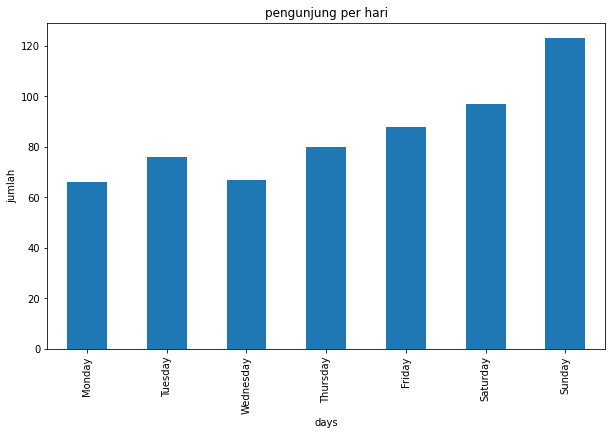

In [113]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot1 = total.groupby(['days']).size().reindex(hari).plot(kind='bar', figsize = (10,6), ylabel='jumlah', 
                                                       title='pengunjung per hari')

plot1.figure.savefig('freq-over-days.jpg')